###### To solve a puzzle, you are given an initial state and a goal state.
###### Target is to reach goal state from initial state using puzzle rules.
######  We can move blank tile only on left, right, up, and down
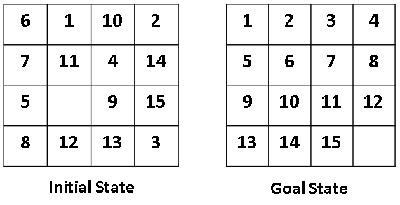

# Generate an intial state of NPuzzle

In [19]:
import matplotlib.pyplot as plt

def plot_puzzle(state):
    #Reshape the 1D state into a 2D grid
    n = int(math.sqrt(len(state)))
    grid = np.array(state).reshape(n, n)

    #Create the plot
    fig, ax = plt.subplots()

    #Display the grid
    ax.matshow(grid, cmap =plt.cm.Blues)

    #Add text annotations to each cell
    for i in range(n):
        for j in range(n):
            if grid[i, j] == 0:
                  ax.text(j, i, ' ', va='center', ha='center') #Display blank space as empty
            else:
                  ax.text(j, i, str(grid[i, j]), va='center', ha='center')

    #Remove ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

In [22]:
import numpy as np
import random
import math
def get_state():
    n = random.choice([3,4,5,6])
    state = list(range(n**2))
    random.shuffle(state)
    return state
st = get_state()
print(st)

[5, 0, 6, 1, 8, 4, 7, 3, 2]


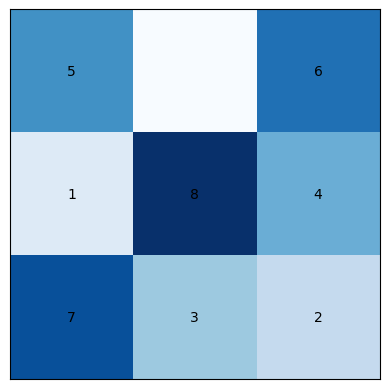

In [25]:
plot_puzzle(st)

**Get Dimension**

In [27]:
def get_dim(state):
  return int(math.sqrt(len(state)))

get_dim(st)

3

# Calculate inversion

Inversion is a pair of tiles that are in the reverse order from where they ought to be. In our case, the bigger number is in front of the smaller one.



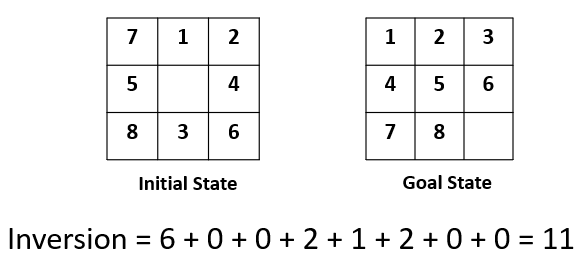

In [36]:
def get_invCount(state):
    count = 0
    for i in range(len(state)):
        for j in range(i+1,len(state)):
            if state[j]!=0 and state[i] > state[j]:
              count += 1
    return count

get_invCount(st)

17

In [38]:
st.index(0)

1

# **Find blank row**

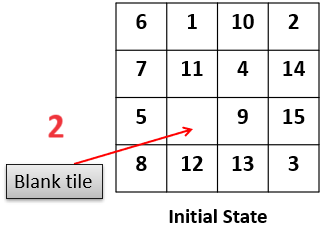

In [50]:
def get_blank_row(state):
    n = int(math.sqrt(len(state)))  # Calculate grid dimension (e.g., 4 for a 4x4 grid)
    blank_index = state.index(0)   # Find the index of the blank tile
    return blank_index // n        # Calculate the row by integer division

# Example usage
st = [6, 1, 10, 2, 7, 11, 4, 14, 5, 9, 15, 0, 8, 12, 13, 3]
blank_row = get_blank_row(st)
print("Row position of the blank tile:", blank_row)

Row position of the blank tile: 2


# Solvability Rules

In [51]:
def isSolvable(state):
    N = get_dim(state)  # Dimension of the grid
    I = get_invCount(state)  # Number of inversions
    R = get_blank_row(state)  # Row position of the blank tile (0-indexed)

    if N % 2 == 1:  # Rule for odd N
        return I % 2 == 0
    else:  # Rule for even N
        return (R % 2 == 0 and I % 2 == 1) or (R % 2 == 1 and I % 2 == 0)

# Example usage
st = [6, 1, 10, 2, 7, 11, 4, 14, 5, 9, 15, 0, 8, 12, 13, 3]
print("Is the puzzle solvable?", isSolvable(st))

Is the puzzle solvable? True


In [41]:
isSolvable(st)

True

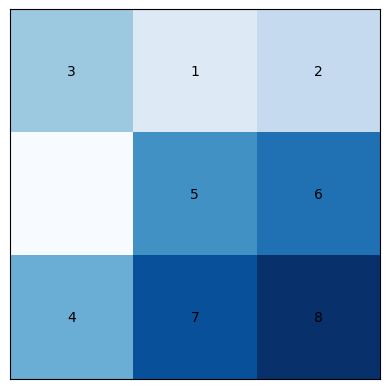

In [48]:
s = get_state()
while(not isSolvable(s)):
  s = get_state()
plot_puzzle(s)